In [64]:
#https://github.com/lsst-camera-dh/eotest/tree/eaa965b3a66033d04d789974f0fd353912311be5/python/lsst/eotest/sensor
%matplotlib inline
import glob
from astropy.io import fits
from get_EO_analysis_results import get_EO_analysis_results
from get_EO_analysis_files import get_EO_analysis_files

from lsst.eotest.sensor.MaskedCCD import MaskedCCD
import lsst.eotest.raft.raft_mosaic  as raft_mosaic
from lsst.eotest.sensor.EOTestPlots import *
import lsst.eotest.sensor.pylab_plotter as pylab_plotter
from astropy.visualization import (ZScaleInterval, MinMaxInterval, LinearStretch, LogStretch, 
                                   ImageNormalize)
import lsst.eotest.image_utils as imutils
import pylab
import matplotlib
import numpy

In [46]:
basepath="/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001"
runnum=13040
sensor = "R22_S22"

In [93]:
class Plotter:
    def __init__(self,interval=ZScaleInterval,stretch=LinearStretch,**kwargs):
        self.interval=interval
        self.stretch=stretch
        self.kwargs=kwargs
        self.win=plot_flat(**kwargs)
        self.annotates=[]
        for annotate in win.fig.findobj(matplotlib.text.Annotation):
            x,y=annotate.get_position()
            text=annotate.get_text()
            Y = 1.48-y if y>0.5 else 0.48-y
            self.annotates.append({"position": (x-0.02, Y) , "text": text})
        
        fh = fits.open("/dev/shm/out.fits")
        self.image = fh[0].data
#        self.run()

    def preprocess(self):
        pylab.clf()        
    
    def main(self):
        norm = ImageNormalize(self.image,
                          interval=self.interval(),
                          stretch=self.stretch())
        
        pylab.imshow(self.image,origin="lower",cmap=self.kwargs["cmap"],norm=norm)
        for annotate in self.annotates:
            pylab.annotate( annotate["text"], annotate["position"], xycoords='axes fraction' )

        
    def postprocess(self):
        pylab.gca().set_xticks([])
        pylab.gca().set_yticks([])
        pylab.title(self.kwargs["title"])
        pylab.colorbar(label="ADU",orientation="vertical",shrink=0.5)       
        for font in self.win.fig.findobj(matplotlib.text.Text):
            font.set_size(18)
        
#        pylab.tight_layout()

    def run(self):
        self.preprocess()
        self.main()
        self.postprocess()

/gpfs/slac/lsst/fs3/g/software/stack/v21.0.0/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


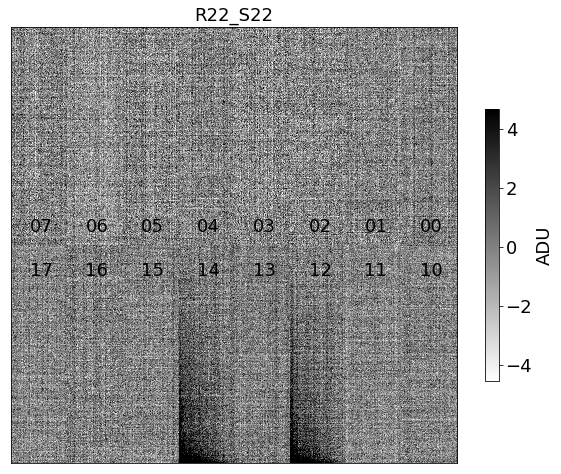

In [94]:
p=Plotter(
    infile=glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/bias_bias_000/*{sensor}.fits")[0],
    nsig=5,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=sensor,
    bias_frame='rowcol',
    binsize=4,
    outfile="/dev/shm/out.fits"
)
p.run()

pylab.savefig("yellowcorner.pdf")

/gpfs/slac/lsst/fs3/g/software/stack/v21.0.0/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


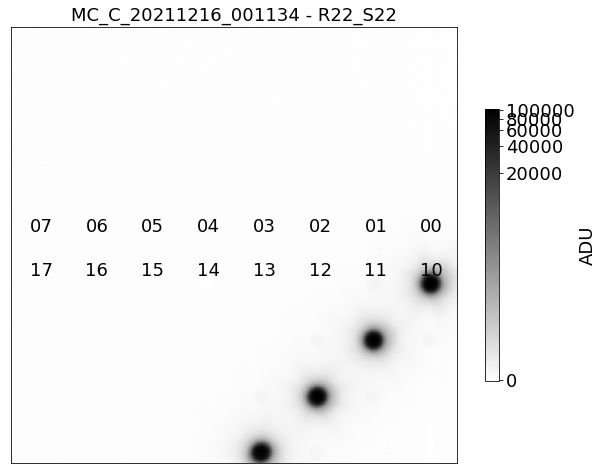

In [95]:
expid = "MC_C_20211216_001134"

p=Plotter(
    infile=glob.glob(f"/gpfs/slac/lsst/fs3/g/data/rawData/focal-plane/20211216/{expid}/*{sensor}.fits")[0],
    nsig=100,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    binsize=4,
    stretch=LogStretch,
    interval=MinMaxInterval,
    outfile="/dev/shm/out.fits"
)
p.run()


pylab.savefig("xtalk.pdf")

/gpfs/slac/lsst/fs3/g/software/stack/v21.0.0/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


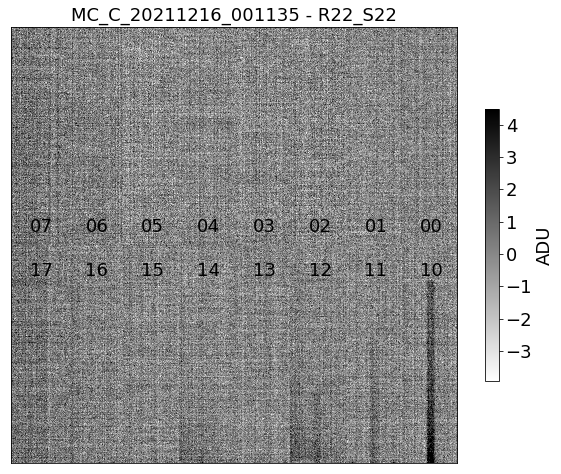

In [96]:
expid = "MC_C_20211216_001135"

p=Plotter(
    infile=glob.glob(f"/gpfs/slac/lsst/fs3/g/data/rawData/focal-plane/20211216/{expid}/*{sensor}.fits")[0],
    nsig=5,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    binsize=4,
    outfile="/dev/shm/out.fits"
)
p.run()

pylab.savefig("persistence.pdf")

In [98]:
expid = "MC_C_20211216_001135"
runnum=12624
imagename="bias_bias_000"
p=Plotter(
    infile=glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}/*{sensor}.fits")[0],
    nsig=5,
    win=pylab_plotter.Window(figsize=(10, 10)),
    cmap=pylab.cm.gray_r,
    title=f"{expid} - {sensor}",
    bias_frame='rowcol',
    binsize=4,
    outfile="/dev/shm/out.fits"
)
p.run()

pylab.savefig("persistence.pdf")

IndexError: list index out of range

In [97]:
p=raft_mosaic.make_raft_mosaic(
    { "R22_S22": glob.glob(f"{basepath}/{runnum}/BOT_acq/v0/*/bias_bias_000/*R22_S22.fits")[0] }
)

In [ ]:
p.plot()

In [101]:
print(f"{basepath}/{runnum}/BOT_acq/v0/*/{imagename}/*{sensor}.fits")

/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/12624/BOT_acq/v0/*/bias_bias_000/*R22_S22.fits
